## Introduction to Autoregressive Integrated Moving Average
+ The Integration (I)
+ ARIMA in Action

Тэги: #ARIMA, #warnings, #statsmodels, #seasonal_decompose, #adfuller #sklearn_metrics,  #pmdarima, #kernel_density_estimation, #plt_subplot, #hist, #plot_kind_kde, #def__timeseries_evaluation_metrics_func, #def__Augmented_Dickey_Fuller_Test_func, #Series_как_Output, #auto_arima, #df__set_index, #plt__rcParams, #confidence_interval, #plot_diagnostics, #trends_and_seasonality

### ARIMA

ARIMA is a method among several used for forecasting univariate variables, which uses information obtained from the variable itself to predict its trend. The variables are regressed on its own past values.

ARIMA is made up of two models: AR and MA:
+ AR(p) is where p equals the order of autocorrelation (designates weighted moving average over past observations) z I (d), where d is the order of integration (differencing), which indicates linear trend or polynomial trend z. 
+ MA(q) is where q equals the order of moving averages (designates weighted moving average over past errors).

Autoregressive integrated moving average—also called ARIMA(p,d,q)— is a
+ forecasting equation that 
+ can make time series stationary with the help of
+ differencing and
+ log techniques when required. 

A time series that should be differentiated to be stationary is an 
+ integrated (d) (I) series. 

Lags of the stationary series are classified as
+ autoregressive (p), which is designated in
+ (AR) terms. 

Lags of the forecast errors are classified as 
+ moving averages (q), which are identified in 
+ (MA) terms 



**ARIMA(p,d,q)** - Autoregressive integrated moving average
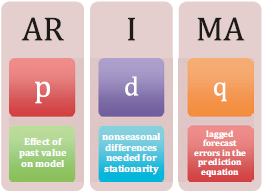

A nonseasonal ARIMA model is called an ARIMA(p,d,q) model, where:
+ **p** is the number of autoregressive terms
+ **d** is the number of nonseasonal differences needed for stationarity
+ **q** is the number of lagged forecast errors in the prediction equation.


**Different ARIMA model behavior with p, d, and q**
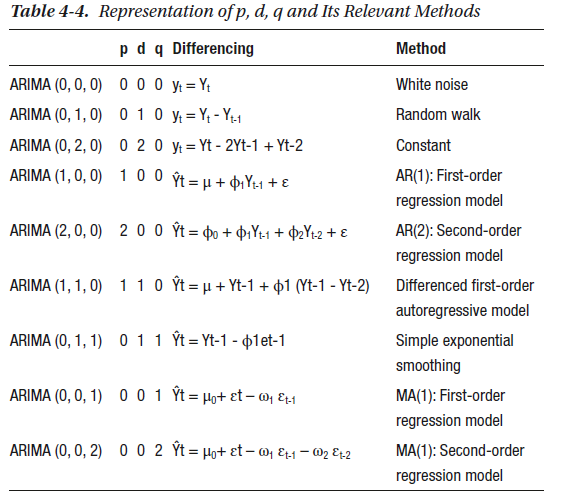
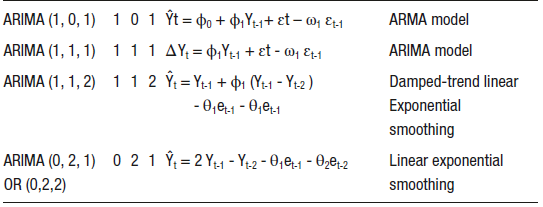

**Определение**

ARIMA — это один из нескольких методов, используемых для прогнозирования одномерных переменных, который использует информацию, полученную от самой переменной, для прогнозирования ее тенденции. Переменные регрессируются по собственным прошлым значениям.

Интегрированное скользящее среднее авторегрессии, также называемое ARIMA(p,d,q), представляет собой уравнение прогнозирования, которое может сделать временные ряды стационарными с помощью методов дифференцирования и логарифмирования, когда это необходимо. 

Временной ряд, который следует дифференцировать, чтобы он был стационарным, представляет собой интегрированный (d)(I) ряд. 

Лаги стационарного ряда классифицируются как авторегрессионные (p), которые обозначаются терминами (AR). 

Запаздывания ошибок прогноза классифицируются как скользящие средние (q), которые идентифицируются в терминах (MA).

ARIMA состоит из двух моделей: AR и MA:
+ AR(p) – это где p соответствует порядку автокорреляции (обозначает взвешенное скользящее среднее по прошлым наблюдениям) z I (d), где d – это порядок интегрирования (дифференцирования), который указывает на линейный тренд или полиномиальный тренд z.
+ MA(q) — это где q соответствует порядку скользящих средних (обозначает взвешенное скользящее среднее по прошлым ошибкам).

### The Integration (I)

Time-series data is often nonstationary, and to make time-series stationary, the series needs to be differentiated. 

This process is known as the integration part (I), and the order of differencing is signified as d. 

Differencing eradicates signals with time, which contains trends and seasonality, so this series contains noise and an irregular component, which will be modeled only. 

**Table 4-5 illustrates how d(I) can be articulated algebraically.**
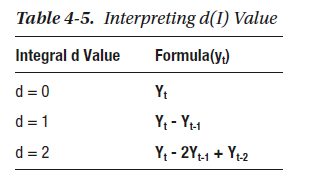

Данные временных рядов часто нестационарны, и чтобы сделать временные ряды стационарными, их необходимо дифференцировать.

Этот процесс известен как часть интегрирования (I), а порядок дифференцирования обозначается как d.

Дифференцирование устраняет сигналы времени, которые содержат тенденции и сезонность, поэтому этот ряд содержит шум и нерегулярную составляющую, которая будет только моделироваться.

### ARIMA in Action
Pmdarima (for py + arima) is a statistical library designed to fill the void in Python’s time-series analysis capabilities, which is the equivalent of R’s auto.arima.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,7]

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from sklearn import metrics
from pmdarima import auto_arima

In [3]:
file = 'data/dow jones.xlsx'
df = pd.read_excel(file, parse_dates=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
1,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000
2,2016-01-19,16009.450195,16171.959961,15900.250000,16016.019531,16016.019531,144360000
3,2016-01-20,15989.450195,15989.450195,15450.559570,15766.740234,15766.740234,191870000
4,2016-01-21,15768.870117,16038.589844,15704.660156,15882.679688,15882.679688,145140000


Выполним базовый анализ данных используя:
+ lines
+ гистограммы
+ kernel density estimation

Kernel density estimation (KDE) is a nonparametric way to estimate the probability density function (PDF) of a random variable

Оценка плотности ядра (KDE) — это непараметрический способ оценки функции плотности вероятности (PDF) случайной величины.

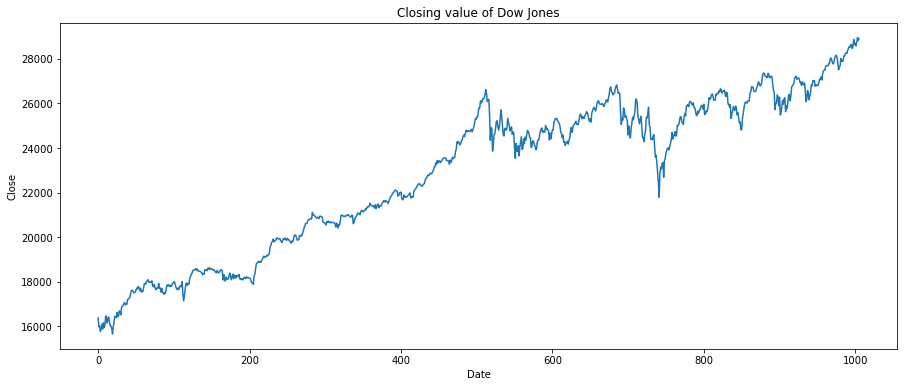

In [4]:
df['Close'].plot(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Closing value of Dow Jones')
plt.show()

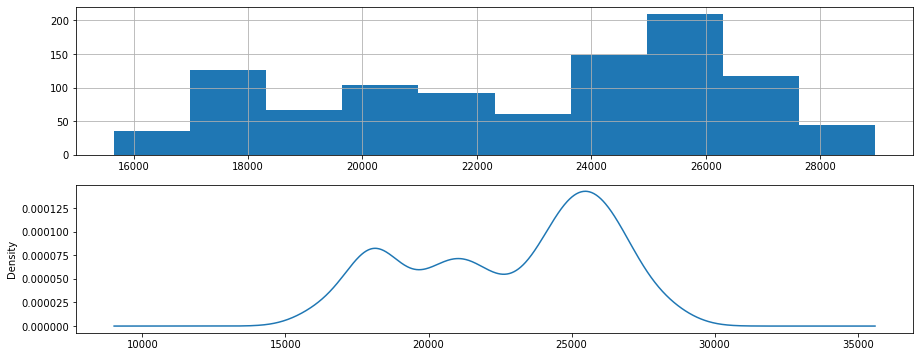

In [5]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df['Close'].hist()
plt.subplot(212)
df['Close'].plot(kind='kde')
plt.show()

In [6]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print('Evalutation metric results: - ')
    print(f'MSE is: {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is: {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is: {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is: {metrics.r2_score(y_true, y_pred)}', end='\n\n')

In [7]:
def Augmented_Dickey_Fuller_Test_func(series, column_name):
    print(f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[:4], 
                         index=['Test Statistic', 'p-value',
                                'No Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)
    if dftest[1] <= 0.05:
        print('Conclusion: ====>')
        print('Reject the null hypothesis')
        print('Data is stationary')
    else:
        print('Conclusion:====>')
        print('Fail to reject the null hypothesis')
        print('Data is non-stationary')

In [8]:
Augmented_Dickey_Fuller_Test_func(df['Close'], 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.015406
p-value                           0.747604
No Lags Used                      0.000000
Number of Observations Used    1005.000000
Critical Value (1%)              -3.436873
Critical Value (5%)              -2.864420
Critical Value (10%)             -2.568304
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


+ сделаем копию данных
+ выполним train/test split: в тест последние 30 дней

In [9]:
X = df[['Close']].copy()
train, test = X[0:-30], X[-30:]

The pmdarima module will help us identify **p**, **d**, and **q** without the hassle of looking at the plot:
+ **p** is the number of autoregressive terms
+ **d** is the number of nonseasonal differences needed for stationarity
+ **q** is the number of lagged forecast errors in the prediction equation.



In [10]:
stepwise_model = auto_arima(train, start_p=1, star_q=1, 
                           max_p=7, max_q=7, seasonal=False,
                           d=None, trace=True, error_action='ignore',
                           suppress_warnings=True, stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13007.222, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13008.517, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13009.598, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13009.501, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13010.432, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13009.646, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13006.142, Time=1.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13007.293, Time=1.76 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13009.554, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13010.655, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13010.677, Time=0.37 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 7.539 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  976
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6499.071
Date:                Tue, 16 Apr 2024   AIC                          13006.142
Time:                        09:34:52   BIC                          13025.672
Sample:                             0   HQIC                         13013.574
                                - 976                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3826      0.146      2.620      0.009       0.096       0.669
ar.L1          0.9674      0.014     70.178      0.000       0.940       0.994
ma.L1         -0.9882      0.009   -112.030      0.000      -1.005      -0.971
sigma2      3.606e+04    962.565     37.467      0.000    3.42e+04     3.8e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              1422.74
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               3.88   Skew:                            -1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Forecast both results and the confidence for the next 30 days**

In [16]:
forecast, conf_int = stepwise_model.predict(n_periods=30, 
                                            return_conf_int=True)
forecast = pd.DataFrame(forecast, columns=['close_pred'])
print(forecast.shape)
forecast.head()

(30, 1)


,close_pred
976,28163.777483
977,28163.944773
978,28164.489162
979,28165.398358
980,28166.660469


In [19]:
df_conf = pd.DataFrame(conf_int, columns=['Upper_bound', 'Lower_bound'])
df_conf['new_index'] = range(976, 1006)
df_conf = df_conf.set_index('new_index')
df_conf.head()

,Upper_bound,Lower_bound
new_index,,
976,27791.566216,28535.988751
977,27642.992835,28684.896711
978,27532.944852,28796.033472
979,27443.459852,28887.336864
980,27367.474647,28965.846291


In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Rearrange the indexes for the plots to align

In [20]:
forecast['new_index'] = range(976, 1006)
forecast = forecast.set_index('new_index')

Plot the results with confidence bounds

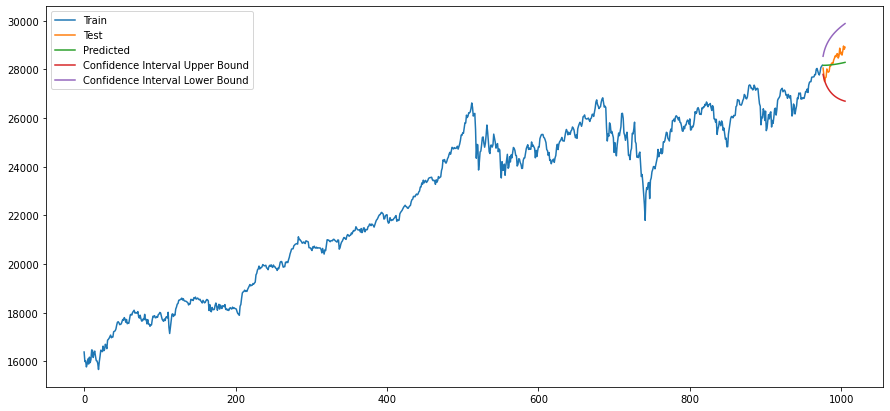

In [21]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Predicted')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper Bound')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower Bound')
plt.legend(loc='best')
plt.show()

Here is a diagnostic plot:

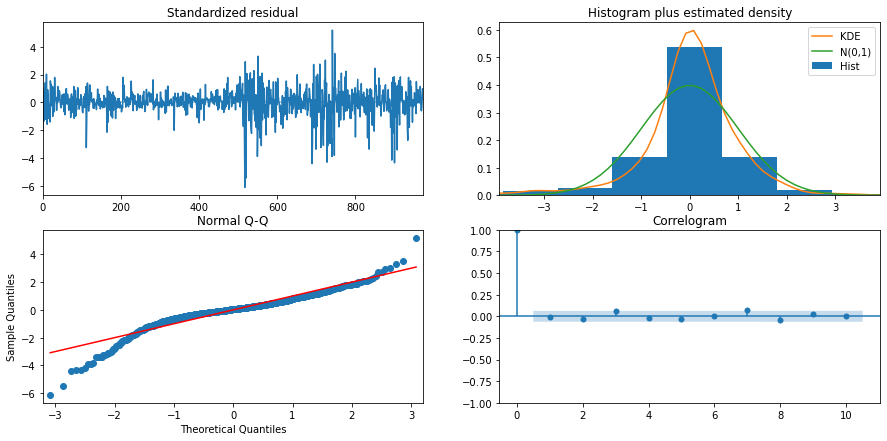

In [23]:
stepwise_model.plot_diagnostics();